In [1]:
contractions = { 
"ain't": "am not",
"aren't": "am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that has",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there has",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who has",
"who've": "who have",
"why's": "why has",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have",
"coz": "because",
"&": "and"
}

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import re
import random
from itertools import combinations 

In [4]:
from wordcloud import WordCloud

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [6]:
from nltk.stem import PorterStemmer
porter_stemmer = PorterStemmer()

In [7]:
from spacy.lang.en.stop_words import STOP_WORDS

In [8]:
import spacy 
nlp = spacy.load("en_core_web_sm")

In [9]:
data = pd.read_csv("train.csv")[["text", "target"]]

In [10]:
data.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [11]:
data["text"].iloc[12]

"#raining #flooding #Florida #TampaBay #Tampa 18 or 19 days. I've lost count "

In [12]:
data.shape

(7613, 2)

In [13]:
data.isnull().sum()

text      0
target    0
dtype: int64

### Target

In [14]:
data["target"].value_counts(normalize=True)

0    0.57034
1    0.42966
Name: target, dtype: float64

### Spliting data to Disaster and non-disaster tweet

In [15]:
disaster_tweet = data[data["target"] == 1]["text"]
non_disaster_tweet = data[data["target"] == 0]["text"]

### Important Words in `#`

In [16]:
imp_words = set()
for word in  " ".join(data["text"]).split():
    score = sid.polarity_scores(word[1:])["compound"]
    if word.startswith("#") and (score > 0.3 or score < -0.3):
        imp_words.add(word[1:].lower())

### Extract important words in `#`

In [17]:
def segment_words(text):
    
    new_words = ""
    hashtag_words = re.findall("#[a-zA-Z]+", text)
    for word in hashtag_words:
        word = word[1:]
        new_words += " ".join([word[x:y] for x, y in combinations(range(len(word) + 1), r = 2) \
                              if word[x:y] in imp_words])
        
    return new_words

In [18]:
data["text"] += data["text"].apply(segment_words)

### Word Counts

In [19]:
data["word_counts"] = data["text"].apply(lambda tweet: len(tweet.split()))

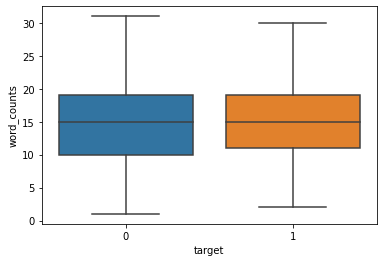

In [20]:
sns.boxplot(data["target"], data["word_counts"])

### Character Counts

In [21]:
data["character_counts"] = data["text"].apply(lambda tweet: np.array([len(word) for word in tweet.split()]).sum())

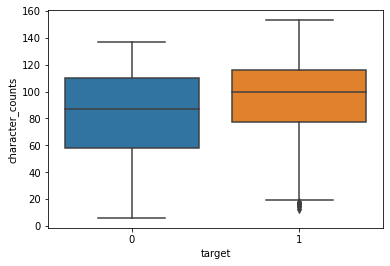

In [22]:
sns.boxplot(data["target"], data["character_counts"])

### Hastag Counts

In [23]:
data["hashtag_counts"] = data["text"].apply(lambda tweet: len(re.findall("#", tweet)))

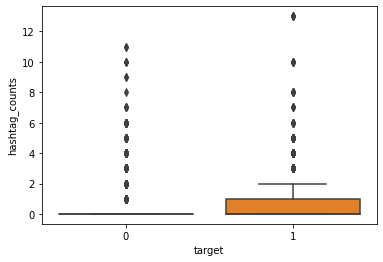

In [24]:
sns.boxplot(data["target"], data["hashtag_counts"])

### URL Counts

In [25]:
data["URL_counts"] = data["text"].apply(lambda tweet: len(re.findall(r'(https?://[^\s]+)', tweet)))

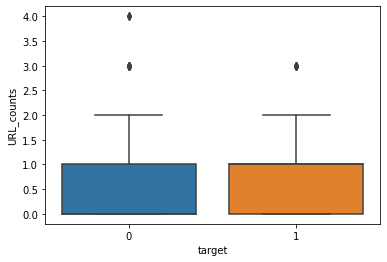

In [26]:
sns.boxplot(data["target"], data["URL_counts"])

### Lowerise Tweet

In [27]:
data["text"] = data["text"].apply(lambda tweet: tweet.lower())

### Contraction to Expansion

In [28]:
def contraction_to_expansion(tweet):
    processed_tweet = ""
    for word in tweet.split():
        if word in contractions.keys():
            processed_tweet += contractions[word]
        else:
            processed_tweet += word
        processed_tweet += " "
    return processed_tweet

In [29]:
data["text"] = data["text"].apply(contraction_to_expansion)

### Stop Word Counts

In [30]:
data["stop_word_counts"] = data["text"].apply(lambda text: len([word for word in text.split() if word in STOP_WORDS]))

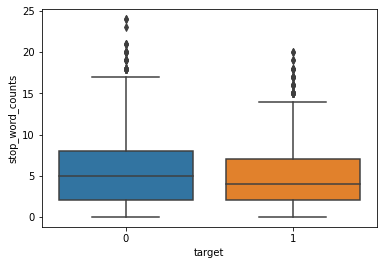

In [31]:
sns.boxplot(data["target"], data["stop_word_counts"])

### Remove URL

In [32]:
data["text"] = data["text"].apply(lambda text: re.sub(r'(https?://[^\s]+)', "", text))

### Replace special symbol with space

In [33]:
def replace_special_symbol(text):
    return re.sub("[^\w\s]", " ", text)

In [34]:
data["text"] = data["text"].apply(replace_special_symbol)

### Replace Multiple Spaces

In [35]:
data["text"] = data["text"].apply(lambda text: " ".join(text.split()))

### Sentiment Score

In [36]:
data["polarity_score"] = data["text"].apply(lambda text: sid.polarity_scores(text)["compound"])

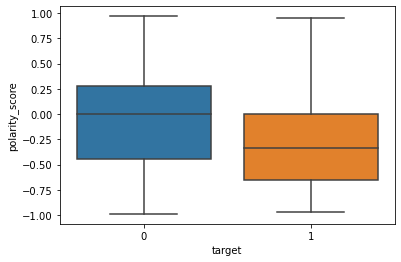

In [37]:
sns.boxplot(data["target"], data["polarity_score"])

### Remove non alphabets

In [38]:
data["text"] = data["text"].apply(lambda text: " ".join([word for word in text.split() if str.isalpha(word)]))

### Remove Single Words

In [39]:
data["text"] = data["text"].apply(lambda text: " ".join([word for word in text.split() if len(word) > 1]))

### Lemmatization and Stematization

In [52]:
def lemmatize_words(text):
    new_text = ""
    for word in nlp(text):
        if (word.lemma_ != "-PRON-"):
            new_text += porter_stemmer.stem(word.lemma_) + " "

    return new_text

In [54]:
data["text"] = data["text"].apply(lemmatize_words)

### Remove Stop Words

In [42]:
# data["text"] = data["text"].apply(lambda text: " ".join([word for word in text.split() if word not in STOP_WORDS]))

### Word Cloud

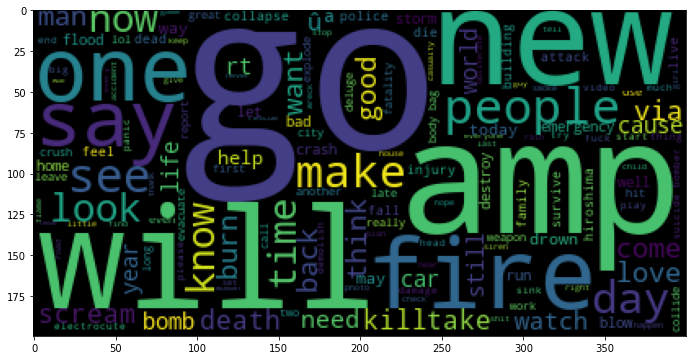

In [43]:
word_cloud = WordCloud().generate_from_text(" ".join(data["text"]))
plt.figure(figsize=(20, 6))
plt.imshow(word_cloud)

### Disaster Tweet WordCloud

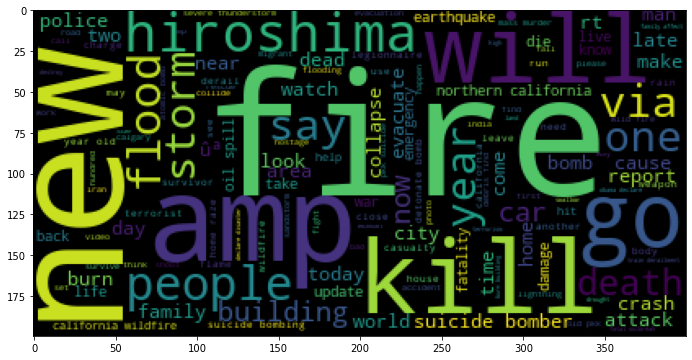

In [44]:
word_cloud = WordCloud().generate_from_text(" ".join(data[data["target"] == 1]["text"]))
plt.figure(figsize=(20, 6))
plt.imshow(word_cloud)

### Non-Disaster Tweet WordCloud

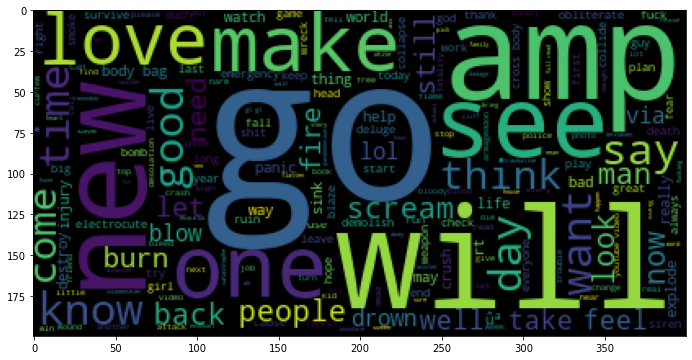

In [45]:
word_cloud = WordCloud().generate_from_text(" ".join(data[data["target"] == 0]["text"]))
plt.figure(figsize=(20, 6))
plt.imshow(word_cloud)

In [55]:
data["text"].iloc[12]

'rain flood florida tampabay tampa or day have lose count '

In [53]:
lemmatize_words(data["text"].iloc[12])

'rain flood florida tampabay tampa or day have lose count '

In [47]:
for token in nlp(data["text"].iloc[12]):
    print(token.lemma_)

rain
flooding
florida
tampabay
tampa
or
day
have
lose
count


In [48]:
porter_stemmer.stem("flooding")

'flood'

In [56]:
data.to_csv("preprocessed_data.csv", index=False)